# Business Understanding

Een gameontwikkelaar heeft ons gevraagd om te kijken wat de beste eigenschappen van een game zijn, om zo zelf een succesvolle game te kunnen maken voor de app store. Om dit makkelijker te kunnen onderzoeken, hebben we de hoofdvraag in meerdere deelvragen opgesplitst.

#### Hoofdvraag:
"Wat zijn de meest belangrijke kenmerken van games met meer dan 1 miljoen downloads?"

#### Deelvragen:
"Is er een trend in het releasejaar en gemiddelde prijs van games?"

"Wat is het aantal games per jaar gereleased?"

"Zit er een relatie tussen het aantal ratings en de lifetime van een game (release  tot laatste update)"

"Zit er een relatie tussen de extra genres en in-app aankopen?"

"Maakt grootte uit voor de ratings van de game?"

"Maakt het aantal games gereleased door de developer uit voor de ratings?"

"Welke taal krijgt de hoogste reviews?"

"Wat hebben de apps zonder rating gemeen?"



#### Yorben: 
Trend in jaar en gemiddelde prijs & ratings en lifetime van een game

# Data Understanding

#### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

%config IPCompleter.greedy = True  
%matplotlib inline

In [20]:
game_data = pd.read_csv("appstore_games.csv")

De data is ons gegeven in een excel bestand genaamd "appstore_games.csv". 

#### Bovenste rijen:

In [21]:
game_data.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


#### Grootte

In [5]:
print("Aantal Rijen: " + str(game_data.shape[0]))

Aantal Rijen: 17007


#### Kolommen

In [6]:
game_data.columns

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')

#### Types

In [7]:
game_data.dtypes

URL                              object
ID                                int64
Name                             object
Subtitle                         object
Icon URL                         object
Average User Rating             float64
User Rating Count               float64
Price                           float64
In-app Purchases                 object
Description                      object
Developer                        object
Age Rating                       object
Languages                        object
Size                            float64
Primary Genre                    object
Genres                           object
Original Release Date            object
Current Version Release Date     object
dtype: object

#### Lege velden?

In [8]:
game_data.isna().sum()

URL                                 0
ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

#### Eigenschappen?

In [9]:
game_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,17007.0,1.059614e+09,2.999676e+08,284921427.0,899654330.0,1.112286e+09,1.286983e+09,1.475077e+09
Average User Rating,7561.0,4.060905e+00,7.514275e-01,1.0,3.5,4.500000e+00,4.500000e+00,5.000000e+00
User Rating Count,7561.0,3.306531e+03,4.232256e+04,5.0,12.0,4.600000e+01,3.090000e+02,3.032734e+06
Price,16983.0,8.134187e-01,7.835732e+00,0.0,0.0,0.000000e+00,0.000000e+00,1.799900e+02
Size,17006.0,1.157064e+08,2.036477e+08,51328.0,22950144.0,5.676895e+07,1.330271e+08,4.005591e+09


# Data Preparation

#### Veld types goed maken en toevoegen

In [43]:
game_data["Original Release Date"] = pd.to_datetime(game_data["Original Release Date"])
game_data["Current Version Release Date"] = pd.to_datetime(game_data["Current Version Release Date"])
game_data["Age Rating"] = game_data["Age Rating"].astype("category")

game_data["release_year"] = game_data["Original Release Date"].dt.year
game_data["lifetime"] = game_data["Current Version Release Date"] - game_data["Original Release Date"]


game_data["lifetime_in_years"] = (game_data["lifetime"].dt.days / 365).agg(round)

#### Lege velden invullen of weghalen

In [11]:
game_data["Price"] = game_data["Price"].fillna(0)

#### Data normalizeren

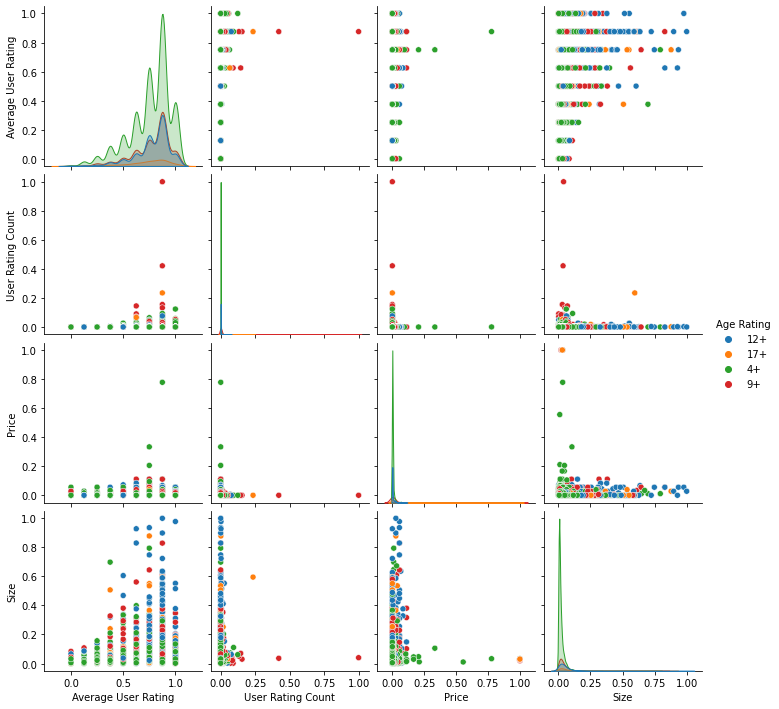

In [45]:
normalizedData = game_data.copy()
normalizedData = normalizedData[["Average User Rating","User Rating Count","Price","Size"]]
normalizedData = (normalizedData - normalizedData.min()) / (normalizedData.max() - normalizedData.min())
normalizedData["Age Rating"] = game_data["Age Rating"]

sns.pairplot(normalizedData, hue="Age Rating")

<AxesSubplot:>

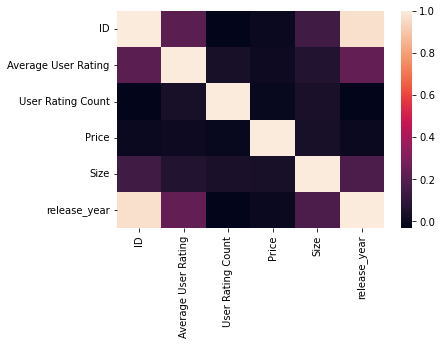

In [14]:
sns.heatmap(game_data.corr())

# Modeling

#### Groeperen en gemiddelde berekenen

[Text(0.5, 0, 'Release Year'), Text(0, 0.5, 'Average Price')]

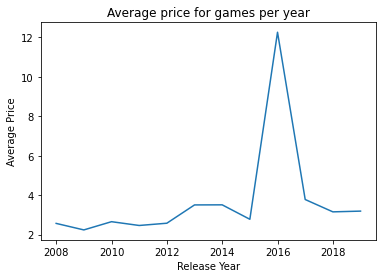

In [41]:
grouped = game_data[game_data["Price"] > 0].set_index("release_year").sort_index().reset_index().groupby("release_year")
peryear = pd.DataFrame(grouped["Price"].mean())
ax = sns.lineplot(data = peryear, x = "release_year", y = "Price")
ax.set(title='Average price for games per year')
ax.set(xlabel="Release Year", ylabel = "Average Price")

[Text(0.5, 0, 'Lifetime in Years'), Text(0, 0.5, 'Average Review Rating')]

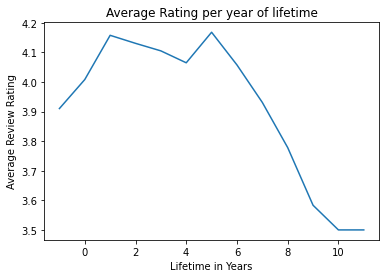

In [40]:
groupedlifetime = game_data[game_data["Average User Rating"] > 0].set_index("lifetime_in_years").sort_index().reset_index().groupby("lifetime_in_years")
pertime = pd.DataFrame(groupedlifetime["Average User Rating"].mean())
ax = sns.lineplot(data = pertime, x = "lifetime_in_years", y = "Average User Rating")
ax.set(title='Average Rating per year of lifetime')
ax.set(xlabel="Lifetime in Years", ylabel = "Average Review Rating")

In [68]:
game_data[game_data["Price"] < 175].sort_values("Price", ascending=False).head(15)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,release_year
2634,https://apps.apple.com/us/app/finabase-realtim...,706398884,Finabase: realtime stocks,Stock Market Trade Buy Invest,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.5,1099.0,139.99,"1.99, 9.99, 59.99",StockIdeal Pro is designed to bring you a stre...,Astontek Inc,4+,EN,1.333432e+08,Finance,"Finance, Simulation, Strategy, Games",2013-09-30,2019-07-17,2013
4846,https://apps.apple.com/us/app/arena-dodge/id93...,933223586,Arena Dodge,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,99.99,NaN,Contained within the Arena.\nGet millions of p...,Key Player Publishing Limited,4+,EN,4.286874e+07,Games,"Games, Strategy, Casual",2014-03-11,2014-03-11,2014
15031,https://apps.apple.com/us/app/goto-bridge-19/i...,1434393509,GOTO Bridge 19,The must-have bridge game,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,4.0,50.0,59.99,NaN,"Discover the 19th edition of GOTO Bridge, the ...",GOTO Games,4+,"EN, FR",4.225659e+08,Games,"Games, Strategy, Card",2018-10-13,2018-11-15,2018
13730,https://apps.apple.com/us/app/blindfold-studen...,1350423680,Blindfold Student Pack 1,Navigation Skills,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,37.99,NaN,"""Blindfold Student Pack 1: Navigation skills i...",marty schultz,4+,EN,4.631654e+07,Education,"Education, Strategy, Board, Games",2018-02-22,2018-02-24,2018
14093,https://apps.apple.com/us/app/chess-openings-w...,1370631887,Chess Openings Wizard,Build 43 companion app,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,4.0,9.0,36.99,NaN,"""Chess Openings Wizard is where tournament pla...",Bookup Corp.,4+,EN,1.881170e+08,Education,"Education, Board, Strategy, Games",2018-12-22,2018-12-22,2018
14281,https://apps.apple.com/us/app/strong-mind-esti...,1383404371,Strong Mind Estimator!,Refine your estimation skills!,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,29.99,NaN,Strong Mind Estimator presents mathematical pu...,Strong Mind Puzzles,4+,EN,1.844285e+08,Education,"Education, Strategy, Games, Puzzle",2019-06-04,2019-06-04,2019
16421,https://apps.apple.com/us/app/maze-jam/id14588...,1458832763,Maze Jam,Jam Packed with Mazes,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,29.99,NaN,"Play artistically handcrafted, unusually brill...",Unusually Brilliant Educational Resources LLC,4+,EN,1.187584e+08,Education,"Education, Puzzle, Games, Strategy",2019-04-17,2019-04-17,2019
3898,https://apps.apple.com/us/app/commander-the-gr...,880963492,Commander the Great War,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,98.0,19.99,NaN,This is a 32 bit app. You will always be able ...,Slitherine,9+,EN,4.084531e+08,Games,"Games, Education, Strategy, Board",2014-07-25,2015-04-05,2014
10376,https://apps.apple.com/us/app/christmas-tree-c...,1180473088,Christmas Tree Construction Simulator 3D Full,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,19.99,NaN,Christmas is coming! Become a city constructio...,Tayga Games OOO,4+,EN,1.082849e+08,Games,"Games, Strategy",2016-04-12,2016-04-12,2016
4609,https://apps.apple.com/us/app/battle-academy-2...,917359165,Battle Academy 2: Eastern Front,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,4.0,83.0,19.99,9.99,This is a 32 bit app. You will always be able ...,Slitherine,12+,EN,5.954601e+08,Games,"Games, Reference, Board, Strategy",2014-10-23,2015-02-04,2014


## Scraper Test

In [9]:
from itunes_app_scraper.scraper import AppStoreScraper
import pandas as pd

In [4]:
scraper = AppStoreScraper()

In [7]:
app_store_list = list(scraper.get_multiple_app_details([1318382054]))

https://itunes.apple.com/lookup?id=1318382054&country=nl&entity=software


In [18]:
df = pd.DataFrame(app_store_list)